In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [86]:
data = pd.read_csv("/Users/isabelserrano/Desktop/contraceptive/contraceptive_for_students.csv", sep = ",")

This data is to address the general question of predicting contraceptive in general. 
Adding in new features: 1) Making education binary split between less than primary and more than primary - based on the risk of not using contraception with a primary level incomplete and complete 2) Making contraceptive use binary: no use and use 

In [87]:
data_binary = data.copy()
data_binary.replace({"contraceptive": {1: "None", 2:"Use", 3:"Use"}}, inplace = True)

data_binary.replace({"wife_education": {1: "Incomp Prim", 2:"Incomp Prim", 3:"Comp Prim", 4:"Comp Prim"}}, \
                    inplace = True)

data_binary.replace({"standard_living": {1: "Low", 2:"Low", 3:"Middle", 4:"High"}}, \
                    inplace = True)

EDA to explore the distribution of use & no use of contraception in our data 

Text(0, 0.5, 'Proportion')

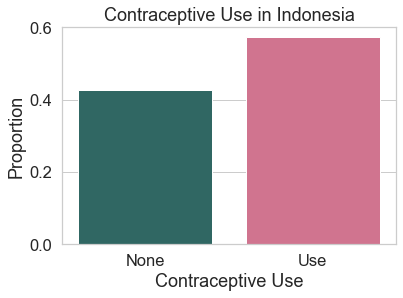

In [88]:
ax = sns.barplot(x = (data_binary.groupby('contraceptive')["contraceptive"].count()/data_binary.shape[0]).index, \
            y = (data_binary.groupby('contraceptive')["contraceptive"].count()/data_binary.shape[0]).values,  \
           palette=['#27706B', '#DF6589'])
plt.title("Contraceptive Use in Indonesia")
plt.xlabel("Contraceptive Use")
plt.ylabel("Proportion")

Text(0, 0.5, 'Proportion')

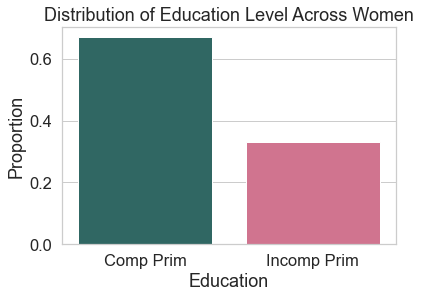

In [89]:
edu = sns.barplot(x = (data_binary.groupby('wife_education')["wife_education"].count()/data_binary.shape[0]).index, \
            y = (data_binary.groupby('wife_education')["wife_education"].count()/data_binary.shape[0]).values,  \
           palette=['#27706B', '#DF6589'])
plt.title("Distribution of Education Level Across Women")
plt.xlabel("Education")
plt.ylabel("Proportion")

Bad news: Definite skew in our data with regards to education. There was also a skew with respect to standard of living. Grouping middle-low and low seemed to redistribute but this might not be the best pairing? We would need to look at distribution of other features for sure. 

Text(0, 0.5, 'Proportion')

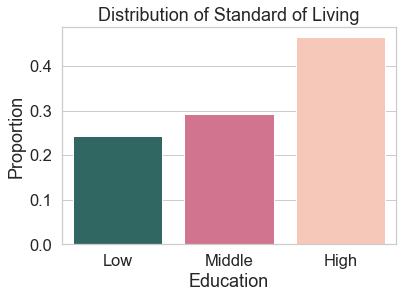

In [90]:
stand_living = sns.barplot(x = (data_binary.groupby('standard_living')["standard_living"].count()/data_binary.shape[0]).index, \
            y = (data_binary.groupby('standard_living')["standard_living"].count()/data_binary.shape[0]).values,  \
           palette=['#27706B', '#DF6589', '#FFC3AF'], order = ["Low", "Middle", "High"])
plt.title("Distribution of Standard of Living")
plt.xlabel("Education")
plt.ylabel("Proportion")

Can split our dataset between short and long term use

In [96]:
data_contr_use = data[data["contraceptive"] != 1]
data_contr_use.replace({"contraceptive": {2:"Long", 3:"Short"}}, inplace = True)
data_contr_use.replace({"wife_education": {1: "Incomp Prim", 2:"Incomp Prim", 3:"Comp Prim", 4:"Comp Prim"}}, \
                    inplace = True)
data_contr_use

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
415,33,Comp Prim,3,6,1,1,3,4,0,Long
416,46,Comp Prim,3,5,1,1,1,4,0,Long
417,35,Comp Prim,4,4,1,1,1,4,0,Long
418,26,Comp Prim,4,2,1,0,1,4,0,Long
419,36,Comp Prim,3,5,1,0,1,3,0,Long
...,...,...,...,...,...,...,...,...,...,...
1468,33,Comp Prim,4,2,1,0,2,4,0,Short
1469,33,Comp Prim,4,3,1,1,1,4,0,Short
1470,39,Comp Prim,3,8,1,0,1,4,0,Short
1471,33,Comp Prim,3,4,1,0,2,2,0,Short


Text(0, 0.5, 'Proportion')

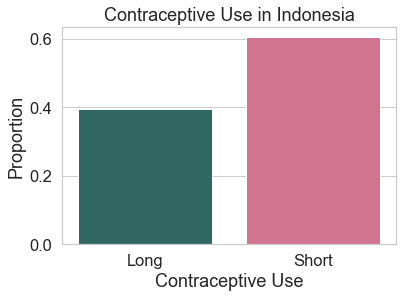

In [95]:
contra = sns.barplot(x = (data_contr_use.groupby('contraceptive')["contraceptive"].count()/data_contr_use.shape[0]).index, \
            y = (data_contr_use.groupby('contraceptive')["contraceptive"].count()/data_contr_use.shape[0]).values,  \
           palette=['#27706B', '#DF6589'])
plt.title("Contraceptive Use in Indonesia")
plt.xlabel("Contraceptive Use")
plt.ylabel("Proportion")

Text(0, 0.5, 'Proportion')

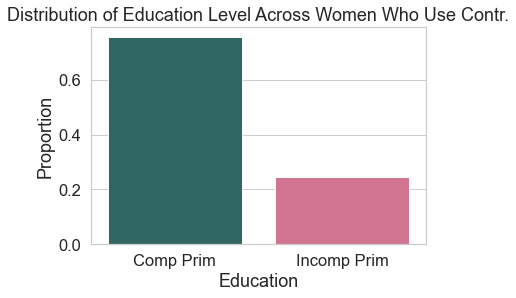

In [97]:
edu = sns.barplot(x = (data_contr_use.groupby('wife_education')["wife_education"].count()/data_contr_use.shape[0]).index, \
            y = (data_contr_use.groupby('wife_education')["wife_education"].count()/data_contr_use.shape[0]).values,  \
           palette=['#27706B', '#DF6589'])
plt.title("Distribution of Education Level Across Women Who Use Contr.")
plt.xlabel("Education")
plt.ylabel("Proportion")

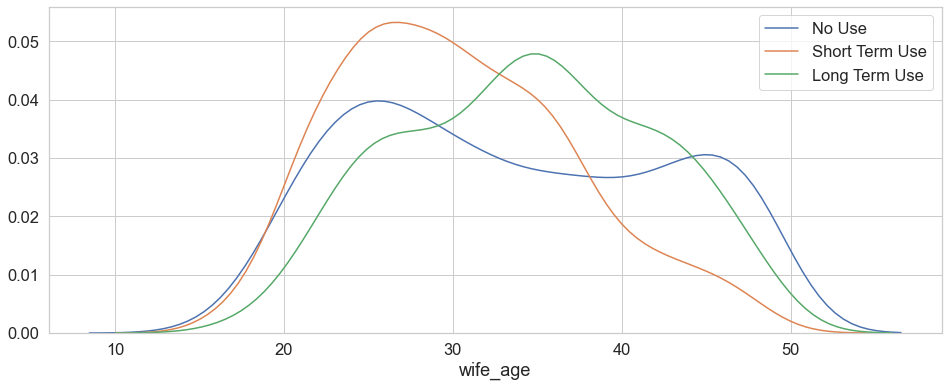

In [8]:
#This one is pretty interesting 
plt.figure(figsize=(16, 6))
sns.distplot(no_contraceptive_use["wife_age"], label = "No Use", hist = False)
sns.distplot(short_term_contraceptive_use["wife_age"], label = "Short Term Use", hist = False)
sns.distplot(long_term_contraceptive_use["wife_age"], label = "Long Term Use", hist = False)
